In [1]:
import pandas as pd  
import numpy as np 
from IPython.display import Image  

from sklearn.preprocessing import MinMaxScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import io
from scipy import misc
#import imageio.v2 as imageio
import graphviz  
import pydotplus

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns 


# Spotify Song Attributes Exploratory Data Analysis
- Import dataset
- Visualize data, observe structure and find some feature of the data
- Train a classifier(Decision Tree)
- Predict whether the user like a song or not.

In [2]:
data = pd.read_csv("C:\Ankur\Frankfurt\Classes\Introduction to Data Analytics in Business\Project\spotify.data.csv")# read data
data.describe() #describe data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [4]:
data.head(10) # present first ten songs

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [5]:
# create dataset of all liked song
like_songs = data.drop(data[data['target'] == 0].index,inplace=False)

# create dataset of all diskliked song
dislike_songs = data.drop(data[data['target'] == 1].index,inplace=False)



# Find top 20 artists the user likes

In [6]:
count_liked_artist = like_songs[['artist', 'song_title']].groupby('artist').count().sort_values('song_title', ascending=False).reset_index()
count_liked_artist.columns = ['artist', 'count']
Top20_liked_artist = count_liked_artist.head(20)
Top20_liked_artist

,artist,count
0,Drake,13
1,Disclosure,12
2,FIDLAR,9
3,Crystal Castles,9
4,Kanye West,8
5,CHVRCHES,7
6,Young Thug,7
7,Beach House,6
8,ASTR,6
9,M83,6


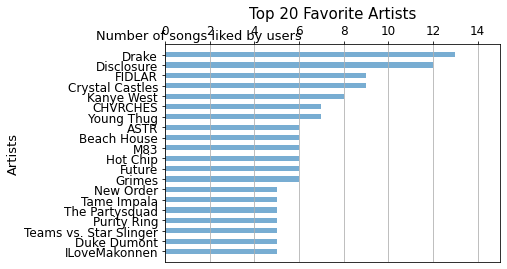

In [7]:
#plot the graph in descending order, run this twice the graph can be better
Top20_liked_artist= Top20_liked_artist.sort_values('count',ascending=True)

fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
ax = fig.add_subplot()


ax.xaxis.tick_top()
ax.set_title('Top 20 Favorite Artists', size = 15)
ax.set_ylabel('Artists', size=13)
ax.set_xlabel('Number of songs liked by users',size = 13)
ax.xaxis.set_label_coords(0.10, 1.07)
ax.grid(visible = True, axis='x')
ax.barh(Top20_liked_artist['artist'],Top20_liked_artist['count'],height = 0.5,alpha = 0.6)

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlim([0,15]) #limit of axis
plt.ylim([-1,len(Top20_liked_artist['artist'])])
plt.show()

# Find top 20 artists the user disikes

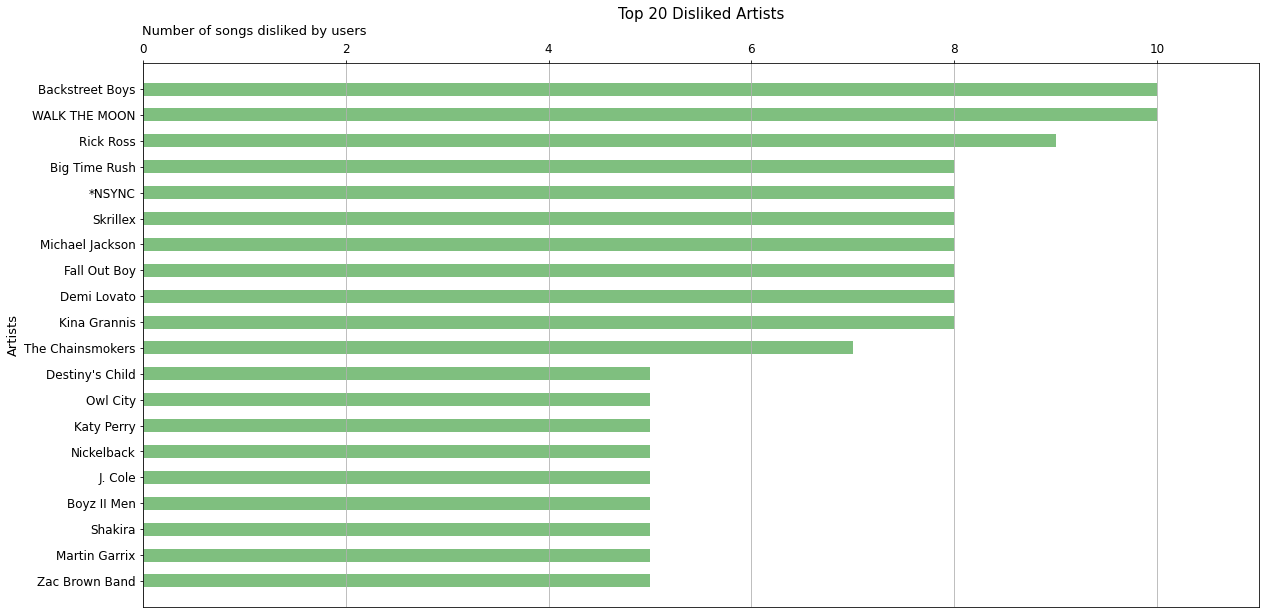

In [8]:
count_disliked_artist = dislike_songs[['artist', 'song_title']].groupby('artist').count().sort_values('song_title', ascending=False).reset_index()
count_disliked_artist.columns = ['artist', 'count']
Top20_disliked_artist = count_disliked_artist.head(20)

Top20_disliked_artist= Top20_disliked_artist.sort_values('count',ascending=True) #plot the graph in descending order

fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
ax1 = fig.add_subplot()


ax1.xaxis.tick_top()
ax1.set_title('Top 20 Disliked Artists', size = 15)
ax1.set_ylabel('Artists', size=13)
ax1.set_xlabel('Number of songs disliked by users',size = 13)
ax1.xaxis.set_label_coords(0.10, 1.07)
ax1.grid(visible = True, axis='x')
ax1.barh(Top20_disliked_artist['artist'],Top20_disliked_artist['count'],height = 0.5,alpha = 0.5,color = "green")

plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlim([0, 11]) #limit of axis
plt.ylim([-1, len(Top20_disliked_artist['artist'])])
plt.show()

# Use Word Cloud to explore the song titles 
- Wordcloud the song title so that we can have an idea of the theme of the songs.
- Ignore words such as "feat,edit,original,remastered,single,radio,remix,extended,version,gonna,wanna". Treat them as stopwords to reduce noise.
- Compare the wordcloud of titles of liked and disliked songs. We can see that the user is more interested in theme of future and club, and less interested in girl and time.
- However the information is very limited by just wordclouding the song title. It will be much better if we can collect some labels to describe the songs.Maybe labeled by other users, the wordcloud will be much more informative.

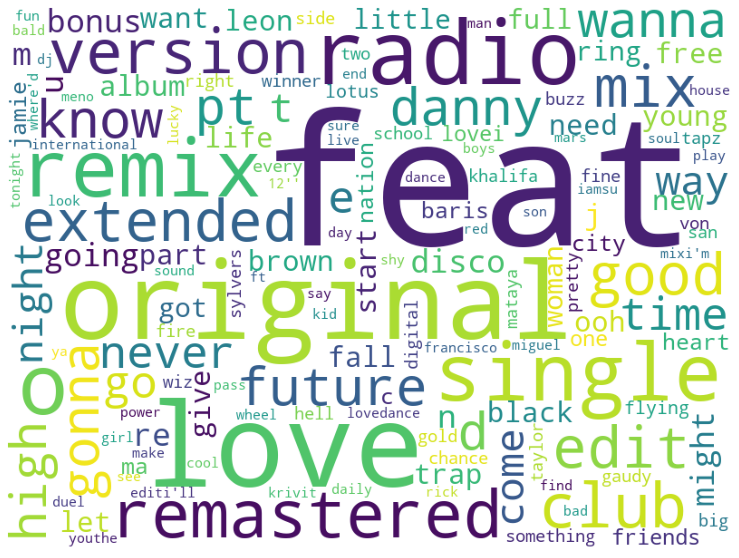

In [9]:
Like_List = list(like_songs['song_title'])
with open('words_from_title_of_liked_songs.txt', 'a+', encoding = 'utf-8') as w:
    for item in Like_List:
        item = item.lower()
        w.write(item)
    w.close()
Text_like = open('words_from_title_of_liked_songs.txt').read()
wordcloud = WordCloud(background_color = "white",width = 800, height = 600,
                      margin = 2,min_font_size = 15,max_font_size = 200,collocations = False,
                      prefer_horizontal = 0.98).generate(Text_like)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

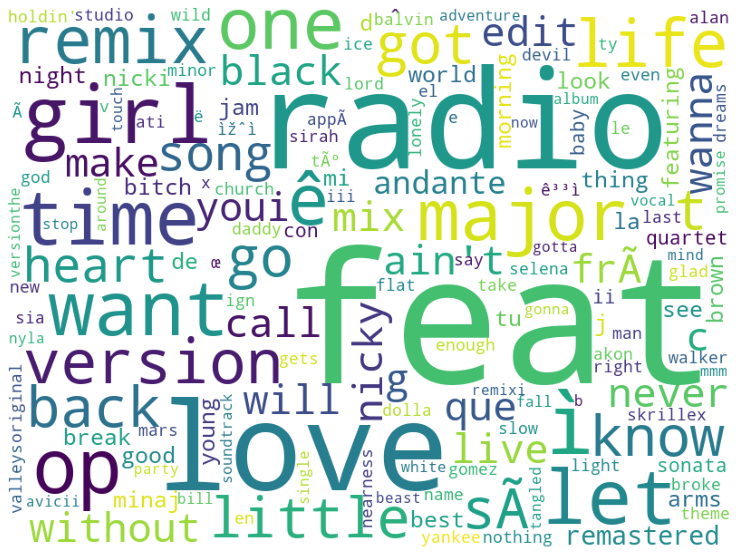

In [10]:
Dislike_List = list(dislike_songs['song_title'])
with open('words_from_title_disliked_songs.txt', 'a+', encoding = 'utf-8') as w:
    for element in Dislike_List:
        element = element.lower()
        w.write(element)
    w.close()
Text_dislike = open('words_from_title_disliked_songs.txt',errors="ignore").read()
wordcloud_dislike = WordCloud(background_color = "white",width = 800, height = 600,
                              margin = 2,min_font_size = 15,max_font_size = 200,collocations = False,
                              prefer_horizontal = 0.98).generate(Text_dislike)
plt.imshow(wordcloud_dislike)
plt.axis("off")
plt.show()

# Analyse the spotify song attributes
Scale all the data in [0,1]

In [11]:
attributes = ['acousticness',
        'danceability',
        'duration_ms',
        'energy',
        'instrumentalness',
        'key',
        'liveness',
        'loudness',
        'mode',
        'speechiness',
        'tempo',
        'time_signature',
        'valence']

In [12]:
#drop song title,artist name column,list order
data_drop_text = data.drop(columns=["song_title", "artist", "Unnamed: 0"])

In [13]:
#scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_drop_text)
scaled_data_drop_text = pd.DataFrame(scaled_data ,columns = data_drop_text.columns)
scaled_data_drop_text

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.010248,0.824826,0.190735,0.426363,0.022439,0.181818,0.153862,0.741141,1.0,0.514441,0.596033,0.75,0.262432,1.0
1,0.199998,0.720418,0.314481,0.350081,0.006260,0.090909,0.124395,0.692162,1.0,0.071005,0.654474,0.75,0.577936,1.0
2,0.034570,0.830626,0.171624,0.403987,0.000240,0.181818,0.147548,0.791369,1.0,0.335351,0.158539,0.75,0.144379,1.0
3,0.607034,0.431555,0.185488,0.328723,0.522541,0.454545,0.077247,0.544709,1.0,0.003784,0.225162,0.75,0.203928,1.0
4,0.180902,0.645012,0.381202,0.555533,0.524590,0.454545,0.442223,0.654132,0.0,0.058393,0.735659,0.75,0.908065,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001062,0.535963,0.261345,0.932872,0.002756,0.090909,0.115976,0.902592,1.0,0.390844,0.158142,0.75,0.184079,0.0
2013,0.088138,0.895592,0.168058,0.892189,0.001711,0.090909,0.035782,0.928149,1.0,0.136083,0.362636,0.75,0.869411,0.0
2014,0.008610,0.597448,0.193365,0.935924,0.004088,0.000000,0.205430,0.934126,1.0,0.105814,0.596150,0.75,0.454659,0.0
2015,0.001645,0.504640,0.171516,0.993897,0.693648,0.090909,0.076300,0.925953,1.0,0.138605,0.595736,0.75,0.614501,0.0


In [14]:
# seperate like and dislike songs 
scaled_like_arributes = scaled_data_drop_text.drop(data[data['target'] == 0].index,inplace=False)
scaled_dislike_arributes = scaled_data_drop_text.drop(data[data['target'] == 1].index,inplace=False)

scaled_like_arributes = scaled_like_arributes.drop(columns=["target"])
scaled_dislike_arributes = scaled_dislike_arributes.drop(columns=["target"])

In [15]:
# calculate the mean of each attribute in liked songs
scaled_like_arributes_mean  = scaled_like_arributes.mean()
scaled_like_arributes_mean_list = list(scaled_like_arributes_mean)
scaled_like_arributes_mean = pd.DataFrame(scaled_like_arributes_mean).T
scaled_like_arributes_mean

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.155052,0.608523,0.244952,0.68656,0.178776,0.496702,0.185324,0.785107,0.577451,0.104999,0.435409,0.744608,0.510223


In [16]:
# calculate the mean of each attribute in disliked songs
scaled_dislike_arributes_mean  = scaled_dislike_arributes.mean()
scaled_dislike_arributes_mean_list = list(scaled_dislike_arributes_mean)
scaled_dislike_arributes_mean = pd.DataFrame(scaled_dislike_arributes_mean).T
#print(scaled_like_arributes_mean)
scaled_dislike_arributes_mean

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.222781,0.542515,0.220617,0.669587,0.093376,0.474423,0.176699,0.801624,0.647944,0.07007,0.4246,0.739468,0.454488


# Plot radar chart (like and dislike)
- See radar chart below. The user has a preference on high instrumentalness, less acousticness but not too loud, more danceability, more positive (high valence) ,more speechiness and some music of minor modality.

In [17]:
# Divide a circle in to 13 parts
angles = np.linspace(0,2*np.pi,len(attributes), endpoint = False)
angles = np.concatenate((angles,[angles[0]]))

attributes.append(attributes[0])

scaled_like_arributes_mean_list.append(scaled_like_arributes_mean_list[0])
scaled_dislike_arributes_mean_list.append(scaled_dislike_arributes_mean_list[0])

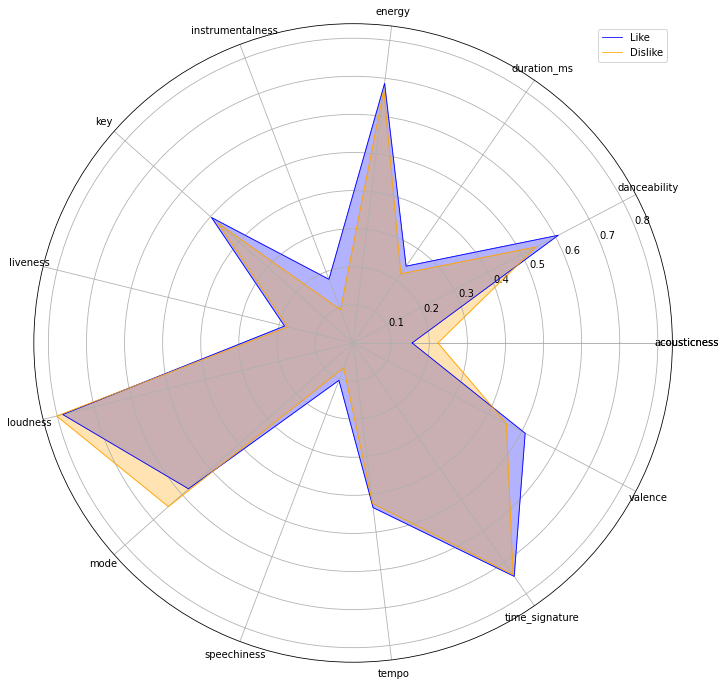

In [18]:
# Plot radar chart using polar coordination
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, polar=True)

#Like 
ax.plot(angles,scaled_like_arributes_mean_list,color = 'blue', linewidth = 0.8, label = 'Like')
ax.fill(angles,scaled_like_arributes_mean_list,alpha = 0.3, color = 'blue')

#Dislike 
ax.plot(angles,scaled_dislike_arributes_mean_list,color = 'orange', linewidth=0.8, label = 'Dislike')
ax.fill(angles,scaled_dislike_arributes_mean_list,alpha = 0.3, color = 'orange')

ax.set_thetagrids(angles * 180/np.pi,attributes)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Plot histgrams for each attribute

In [19]:
pos_tempo = data[data["target"] == 1]["tempo"] #if target=1 postive tempo (like)
neg_tempo = data[data["target"] == 0]["tempo"] #if target=0 negative tempo (dislike)

pos_dance = data[data["target"] == 1]["danceability"] 
neg_dance = data[data["target"] == 0]["danceability"] 

pos_duration = data[data["target"] == 1]["duration_ms"] 
neg_duration = data[data["target"] == 0]["duration_ms"] 

pos_acousticness = data[data["target"] == 1]["acousticness"] 
neg_acousticness = data[data["target"] == 0]["acousticness"] 

pos_energy = data[data["target"] == 1]["energy"] 
neg_energy = data[data["target"] == 0]["energy"] 

pos_instrumentalness = data[data["target"]==1]["instrumentalness"] 
neg_instrumentalness = data[data["target"]==0]["instrumentalness"] 

pos_key = data[data["target"] == 1]["key"] 
neg_key = data[data["target"] == 0]["key"] 

pos_liveness = data[data["target"] == 1]["liveness"] 
neg_liveness = data[data["target"] == 0]["liveness"] 

pos_loudness = data[data["target"] == 1]["loudness"]
neg_loudness = data[data["target"] == 0]["loudness"] 

pos_mode = data[data["target"] == 1]["mode"]
neg_mode = data[data["target"] == 0]["mode"] 

pos_time_signature = data[data["target"] == 1]["time_signature"]
neg_time_signature = data[data["target"] == 0]["time_signature"] 

pos_valence = data[data["target"] == 1]["valence"]
neg_valence = data[data["target"] == 0]["valence"] 

pos_speechiness = data[data["target"] == 1]["speechiness"]
neg_speechiness = data[data["target"] == 0]["speechiness"] 

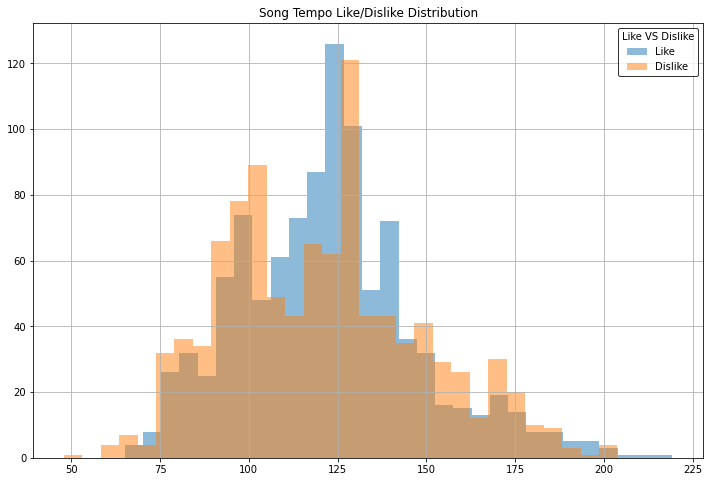

In [20]:
fig=plt.figure(figsize=(12,8)) 
plt.title("Song Tempo Like/Dislike Distribution") 

# alpha means transparency ，bins means how many columns the data is distributed
pos_tempo.hist(alpha = 0.5, bins = 30,label = "Like") 
neg_tempo.hist(alpha = 0.5, bins = 30,label = "Dislike")

plt.legend(loc="upper right",frameon =True,edgecolor="black",facecolor="white",title='Like VS Dislike') 

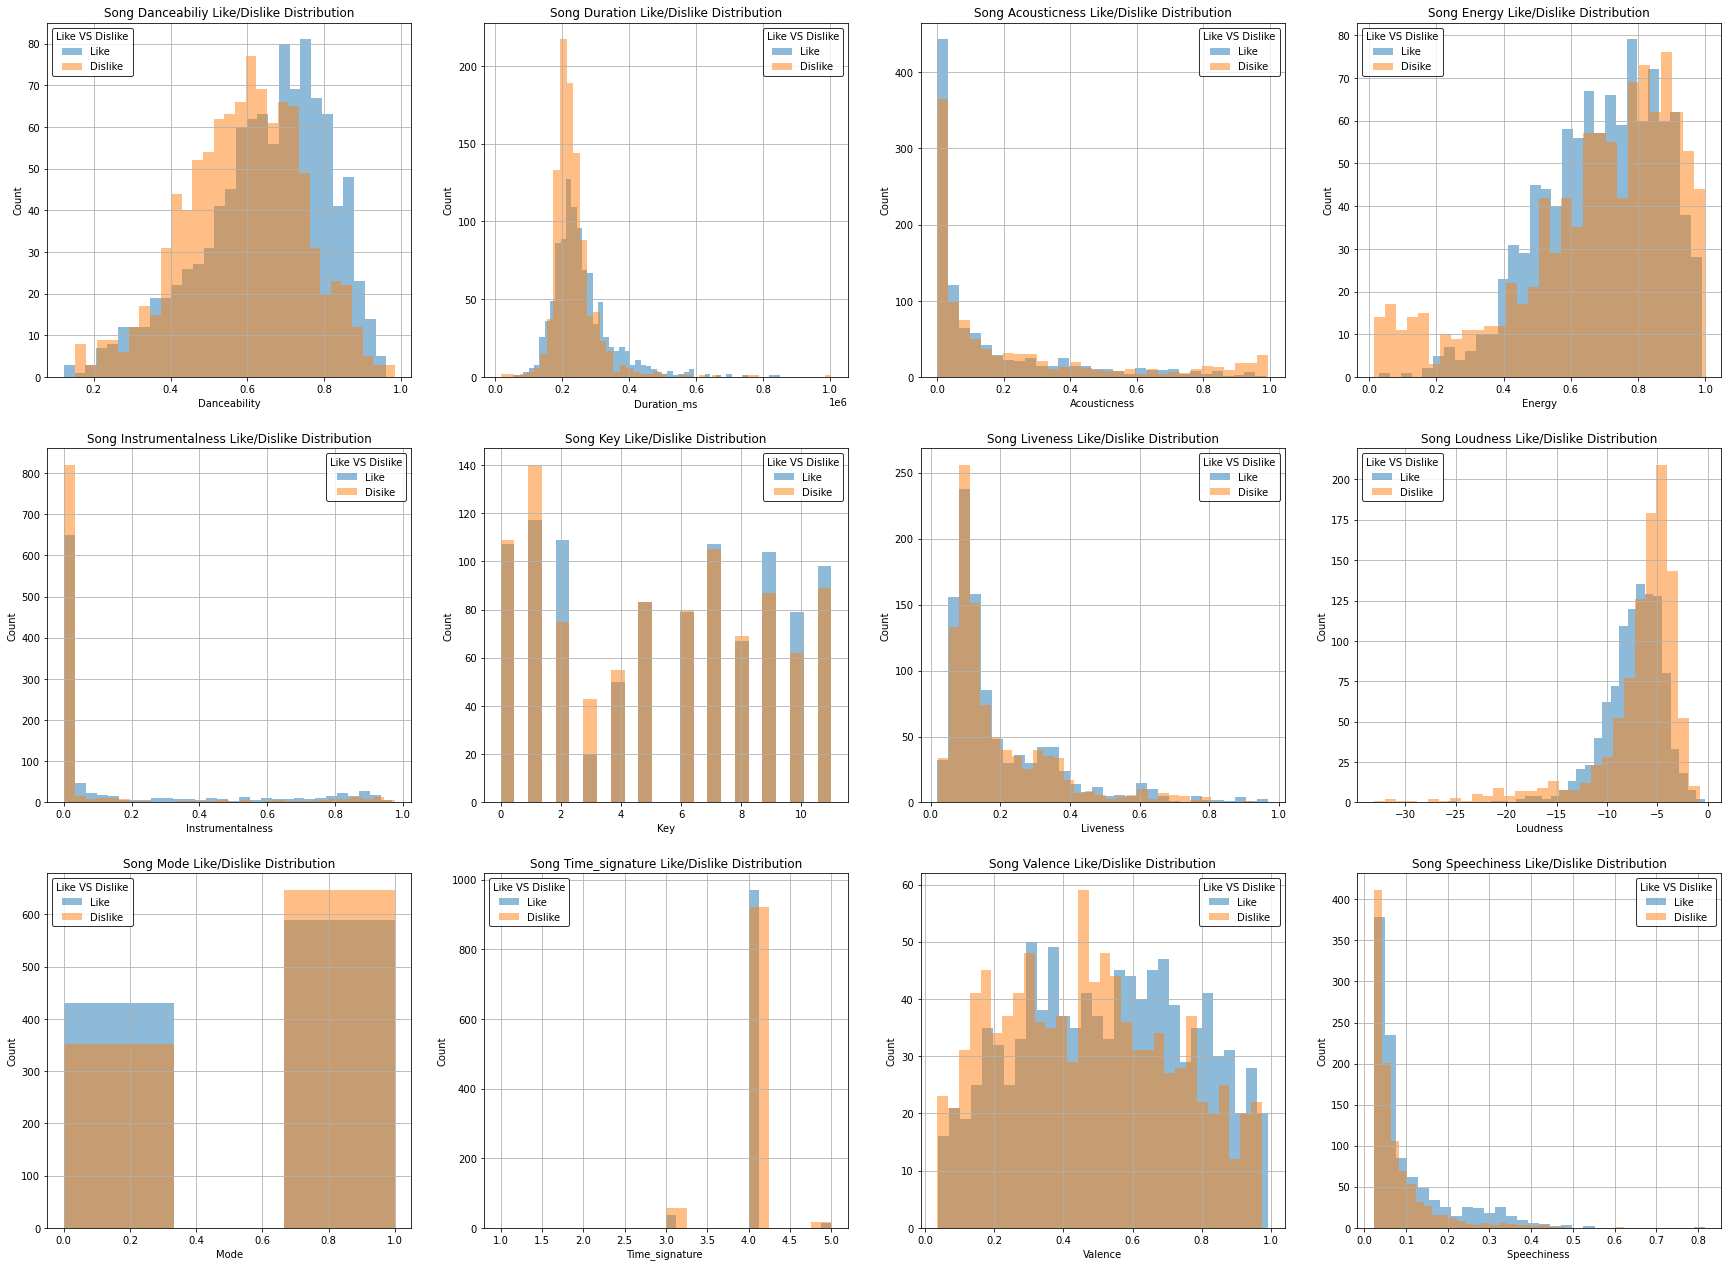

In [21]:
fig2= plt.figure(figsize=(30,30))

#Danceability
ax2 = fig2.add_subplot(4,4,1)
ax2.set_xlabel('Danceability')
ax2.set_ylabel('Count')
ax2.set_title('Song Danceabiliy Like/Dislike Distribution')
pos_dance.hist(alpha = 0.5,bins = 30,label = "Like")
neg_dance.hist(alpha = 0.5,bins = 30,label = "Dislike")
ax2.legend(loc = "upper left",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Duration_ms 
ax3 = fig2.add_subplot(4,4,2)
ax3.set_xlabel('Duration_ms')
ax3.set_ylabel('Count')
ax3.set_title('Song Duration Like/Dislike Distribution')
pos_duration.hist(alpha=0.5,bins=50,label="Like")
neg_duration.hist(alpha=0.5,bins=50,label="Dislike")
ax3.legend(loc="upper right",frameon =True,edgecolor="black",facecolor="white",title='Like VS Dislike') 

#Acousticness  
ax4 = fig2.add_subplot(4,4,3)
ax4.set_xlabel('Acousticness')
ax4.set_ylabel('Count')
ax4.set_title('Song Acousticness Like/Dislike Distribution')
pos_acousticness.hist(alpha = 0.5,bins = 30,label = "Like")
neg_acousticness.hist(alpha = 0.5,bins = 30,label = "Disike")
ax4.legend(loc = "upper right",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Energy  
ax5 = fig2.add_subplot(4,4,4)
ax5.set_xlabel('Energy')
ax5.set_ylabel('Count')
ax5.set_title('Song Energy Like/Dislike Distribution')
pos_energy.hist(alpha = 0.5,bins = 30,label = "Like")
neg_energy.hist(alpha = 0.5,bins = 30,label = "Disike")
ax5.legend(loc = "upper left",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Instrumentalness  
ax6 = fig2.add_subplot(4,4,5)
ax6.set_xlabel('Instrumentalness')
ax6.set_ylabel('Count')
ax6.set_title('Song Instrumentalness Like/Dislike Distribution')
pos_instrumentalness.hist(alpha = 0.5,bins = 30,label = "Like")
neg_instrumentalness.hist(alpha = 0.5,bins = 30,label = "Disike")
ax6.legend(loc = "upper right",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Key  
ax7 = fig2.add_subplot(4,4,6)
ax7.set_xlabel('Key')
ax7.set_ylabel('Count')
ax7.set_title('Song Key Like/Dislike Distribution')
pos_key.hist(alpha = 0.5,bins = 24,label = "Like")
neg_key.hist(alpha = 0.5,bins = 24,label = "Disike")
ax7.legend(loc = "upper right",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Liveness  
ax8 = fig2.add_subplot(4,4,7)
ax8.set_xlabel('Liveness')
ax8.set_ylabel('Count')
ax8.set_title('Song Liveness Like/Dislike Distribution')
pos_liveness.hist(alpha = 0.5,bins = 30,label = "Like")
neg_liveness.hist(alpha = 0.5,bins = 30,label = "Disike")
ax8.legend(loc="upper right",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Loudness  
ax9 = fig2.add_subplot(4,4,8)
ax9.set_xlabel('Loudness')
ax9.set_ylabel('Count')
ax9.set_title('Song Loudness Like/Dislike Distribution')
pos_loudness.hist(alpha = 0.5,bins = 30,label = "Like")
neg_loudness.hist(alpha = 0.5,bins = 30,label = "Dislike")
ax9.legend(loc = "upper left",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Mode 
ax10 = fig2.add_subplot(4,4,9)
ax10.set_xlabel('Mode')
ax10.set_ylabel('Count')
ax10.set_title('Song Mode Like/Dislike Distribution')
pos_mode.hist(alpha=0.5,bins=3,label="Like")
neg_mode.hist(alpha=0.5,bins=3,label="Dislike")
ax10.legend(loc="upper left",frameon =True,edgecolor="black",facecolor="white",title='Like VS Dislike') 

#Time_signature 
ax11 = fig2.add_subplot(4,4,10)
ax11.set_xlabel('Time_signature ')
ax11.set_ylabel('Count')
ax11.set_title('Song Time_signature Like/Dislike Distribution')
pos_time_signature.hist(alpha = 0.5,bins=16,label = "Like")
neg_time_signature.hist(alpha = 0.5,bins = 16,label = "Dislike")
ax11.legend(loc = "upper left",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Valence 
ax12 = fig2.add_subplot(4,4,11)
ax12.set_xlabel('Valence')
ax12.set_ylabel('Count')
ax12.set_title('Song Valence Like/Dislike Distribution')
pos_valence.hist(alpha = 0.5,bins = 30,label = "Like")
neg_valence.hist(alpha = 0.5,bins = 30,label = "Dislike")
ax12.legend(loc = "upper right",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 

#Speechiness 
ax13 = fig2.add_subplot(4,4,12)
ax13.set_xlabel('Speechiness ')
ax13.set_ylabel('Count')
ax13.set_title('Song Speechiness Like/Dislike Distribution')
pos_speechiness .hist(alpha = 0.5,bins = 30,label = "Like")
neg_speechiness .hist(alpha = 0.5,bins=30,label = "Dislike")
ax13.legend(loc = "upper right",frameon = True,edgecolor = "black",facecolor = "white",title = 'Like VS Dislike') 


# Find the correlation of each attribute
- Energy and loudness have high positive correlation, and both of them are negatively correlated with acousticness
- Danceability, instrumentalness, speechiness and valence have relatively high positive correlation with like or dislike preference.Acousticness has reletively high negative correlation with like or dislike.

In [22]:
# Drop text content in data
df = data.drop(columns = ["song_title","artist","Unnamed: 0"])
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


In [23]:
df.fillna(0)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0


# Pearson’s Correlation

The Pearson correlation coefficient (named for Karl Pearson) can be used to summarize the strength of the linear relationship between two data samples. Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

<AxesSubplot:>

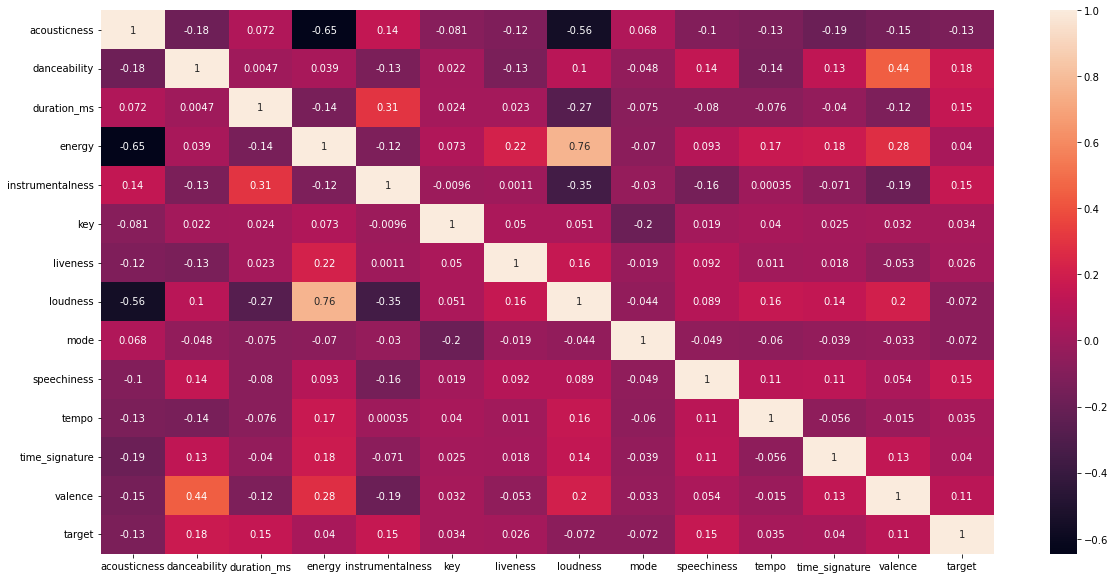

In [24]:
# plot correlation heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

# Build Classification model 

Split the data into training data and testing data.

In [36]:
train,test = train_test_split (data, test_size=0.25,random_state=5)
print("Training size:{};Test size:{}".format(len(train),len(test)))
data.columns

Training size:1512;Test size:505


Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [37]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']

features

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence']

In [38]:
x_train=train[features]
y_train=train["target"]

x_test=test[features]
y_test=test["target"]

# Cross validate and grid search on the decision tree Classifier

##### Advantages of Decision Tree:

   * It can be used for both Regression and Classification problems.
   * Decision Trees are very easy to grasp as the rules of splitting is clearly mentioned.
   * Complex decision tree models are very simple when visualized. It can be understood just by visualising.
   * Scaling and normalization are not needed.


##### Disadvantages of Decision Tree:


   * A small change in data can cause instability in the model because of the greedy approach.
   * Probability of overfitting is very high for Decision Trees.
   * It takes more time to train a decision tree model than other classification algorithms.

In [69]:
# Implementing cross validation and grid search
depth = np.arange(1, 20)
criterion = ['entropy','gini']
min_samples_split = np.arange(2,20)
param_grid = {'max_depth': depth,'min_samples_split': min_samples_split,'criterion': criterion}
tree = GridSearchCV(DecisionTreeClassifier(),param_grid, cv = 10, verbose = 1, n_jobs = -1)
tree.fit(x_train, y_train) 
tree.best_params_

Fitting 10 folds for each of 684 candidates, totalling 6840 fits


{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [70]:
tree.best_score_ 

0.7242288253746951

In [80]:
best_grid = tree.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=4)

In [81]:
y_pred = best_grid.predict(x_test)
score = accuracy_score(y_test,y_pred)*100
print("Accuracy using Decision Tree:",round(score,1),"%")

Accuracy using Decision Tree: 72.1 %


Text(0.5, 1.0, 'Cross validation and grid search on the decision tree')

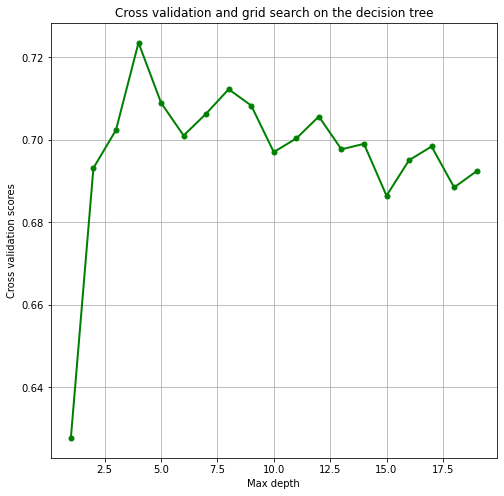

In [82]:
# plot the grid search graph
scores = list()
DT = DecisionTreeClassifier()
for C in depth:
    DT.max_depth = C
    this_scores = cross_val_score(DT, x_train, y_train,cv = 10)
    scores.append(np.mean(this_scores))

plt.figure(figsize = (8,8))
plt.plot(depth,scores,color = 'green', marker = 'o',linewidth = 2, markersize = 5)
plt.grid(visible = True, axis ='both')
plt.ylabel("Cross validation scores")
plt.xlabel("Max depth")
plt.xticks()
plt.title('Cross validation and grid search on the decision tree')

In [45]:
clf = best_grid
clf

DecisionTreeClassifier(max_depth=4)

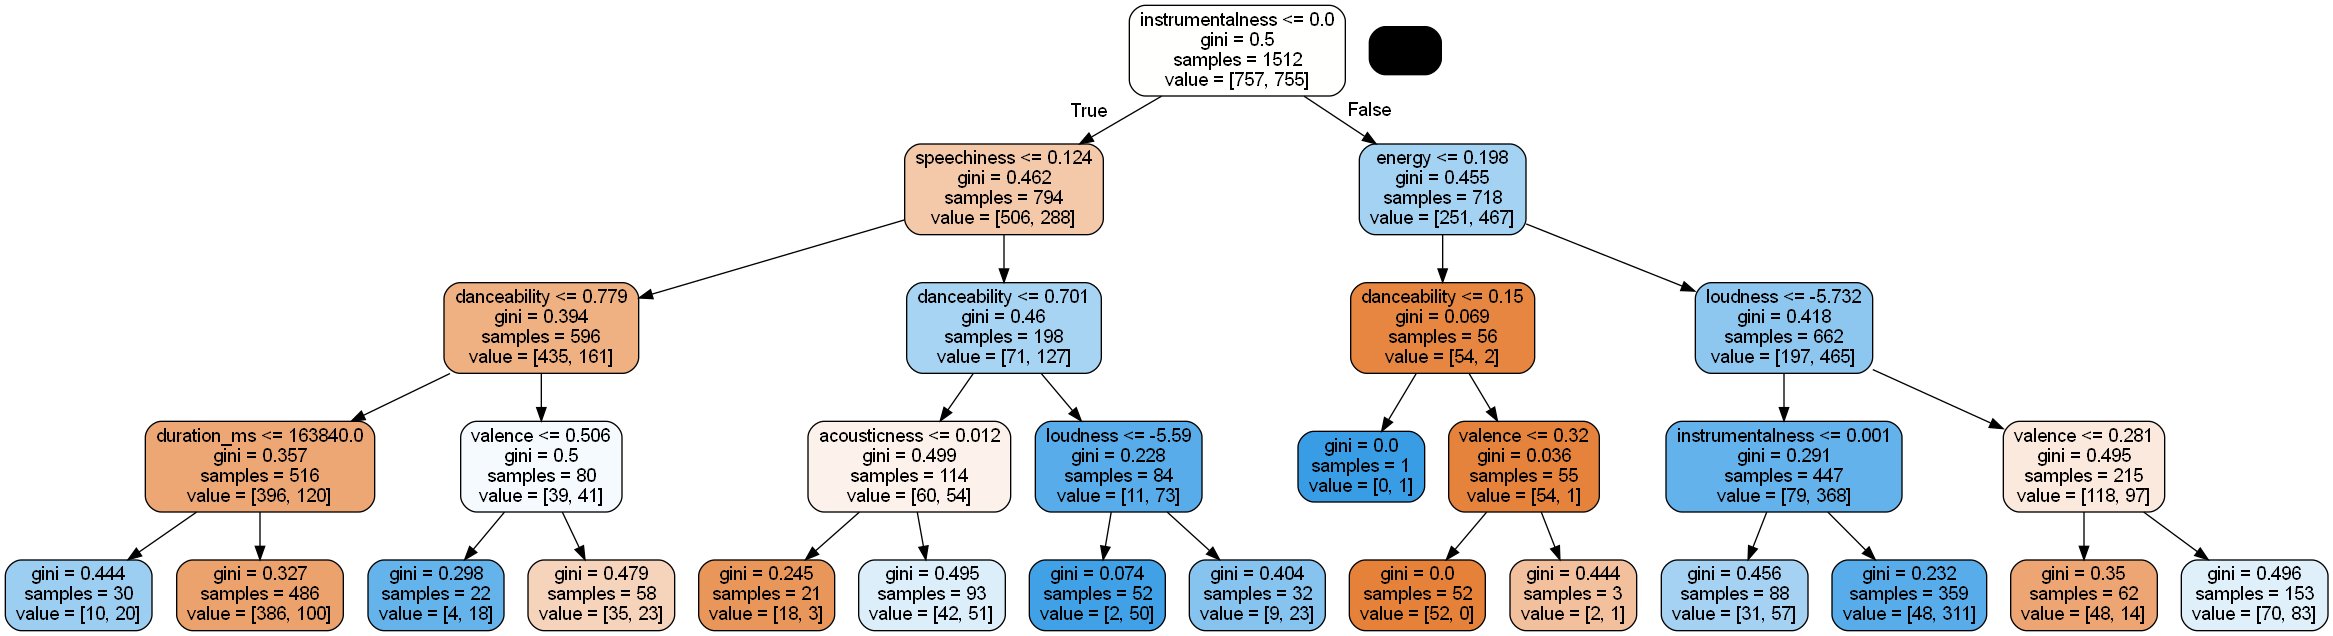

In [46]:
features
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = features,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

# Cross validate and grid search on the Random Forest Classifier

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Implementing cross validation and grid search
max_depth = np.arange(1,10)
max_samples = np.arange(100,1000,100)
min_samples_split = np.arange(2,10)
random_grid = {'max_depth': max_depth ,"max_samples":max_samples,"min_samples_split":min_samples_split}
forest = GridSearchCV(RandomForestClassifier(),random_grid, verbose=1, n_jobs = -1)
forest.fit(x_train, y_train) 
forest.best_params_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


{'max_depth': 9, 'max_samples': 700, 'min_samples_split': 4}

In [74]:
forest.best_score_

0.7843879089895744

In [75]:
ran_grid = forest.best_estimator_
ran_grid

RandomForestClassifier(max_depth=9, max_samples=700, min_samples_split=4)

In [76]:
y_pred = ran_grid.predict(x_test)
score = accuracy_score(y_test,y_pred)*100
print("Accuracy using Decision Tree:",round(score,1),"%")

Accuracy using Decision Tree: 75.4 %


Text(0.5, 1.0, 'Cross validation and grid search on the Random Forest')

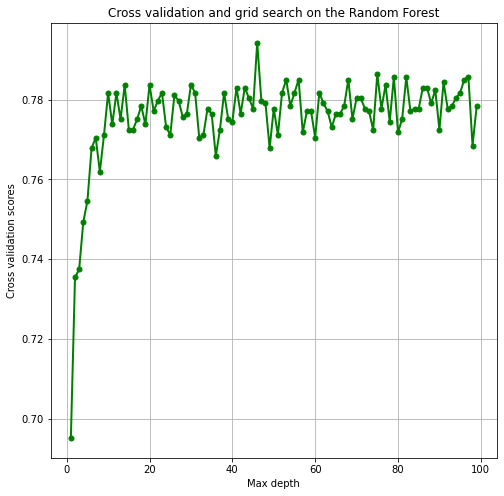

In [87]:
# plot the grid search graph
scores = list()
depth = np.arange(1,100)
RF = RandomForestClassifier()
for C in depth:
    RF.max_depth = C
    this_scores = cross_val_score(RF, x_train, y_train,cv = 5,n_jobs = -1)
    scores.append(np.mean(this_scores))

plt.figure(figsize = (8,8))
plt.plot(depth,scores,color = 'green', marker = 'o',linewidth = 2, markersize = 5)
plt.grid(visible = True, axis ='both')
plt.ylabel("Cross validation scores")
plt.xlabel("Max depth")
plt.xticks()
plt.title('Cross validation and grid search on the Random Forest')

# Cross validate and grid search on the KNN.

In [55]:
knn_data = scaled_data_drop_text
knn_data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.010248,0.824826,0.190735,0.426363,0.022439,0.181818,0.153862,0.741141,1.0,0.514441,0.596033,0.75,0.262432,1.0
1,0.199998,0.720418,0.314481,0.350081,0.006260,0.090909,0.124395,0.692162,1.0,0.071005,0.654474,0.75,0.577936,1.0
2,0.034570,0.830626,0.171624,0.403987,0.000240,0.181818,0.147548,0.791369,1.0,0.335351,0.158539,0.75,0.144379,1.0
3,0.607034,0.431555,0.185488,0.328723,0.522541,0.454545,0.077247,0.544709,1.0,0.003784,0.225162,0.75,0.203928,1.0
4,0.180902,0.645012,0.381202,0.555533,0.524590,0.454545,0.442223,0.654132,0.0,0.058393,0.735659,0.75,0.908065,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.001062,0.535963,0.261345,0.932872,0.002756,0.090909,0.115976,0.902592,1.0,0.390844,0.158142,0.75,0.184079,0.0
2013,0.088138,0.895592,0.168058,0.892189,0.001711,0.090909,0.035782,0.928149,1.0,0.136083,0.362636,0.75,0.869411,0.0
2014,0.008610,0.597448,0.193365,0.935924,0.004088,0.000000,0.205430,0.934126,1.0,0.105814,0.596150,0.75,0.454659,0.0
2015,0.001645,0.504640,0.171516,0.993897,0.693648,0.090909,0.076300,0.925953,1.0,0.138605,0.595736,0.75,0.614501,0.0


In [62]:
train, test = train_test_split (knn_data, test_size=0.25,random_state=5)
knn_x_train = train[features]
knn_y_train = train["target"]

knn_x_test = test[features]
knn_y_test = test["target"]

In [64]:
k_neighbors = np.arange(1, 200)
param_grid = {'n_neighbors': k_neighbors}
neigh = GridSearchCV(KNeighborsClassifier(),param_grid,scoring = 'accuracy', cv =5,n_jobs=-1)
neigh.fit(knn_x_train, knn_y_train)
neigh.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [65]:
neigh.best_score_

0.6911371931895176

In [66]:
knn_clf = neigh.best_estimator_
knn_y_pred = knn_clf.predict(knn_x_test)
score =accuracy_score(knn_y_test,knn_y_pred)*100
print("Accuracy using KNN:",round(score,1),"%")

Accuracy using KNN: 66.1 %


Text(0.5, 1.0, 'Cross validation and grid search on KNN')

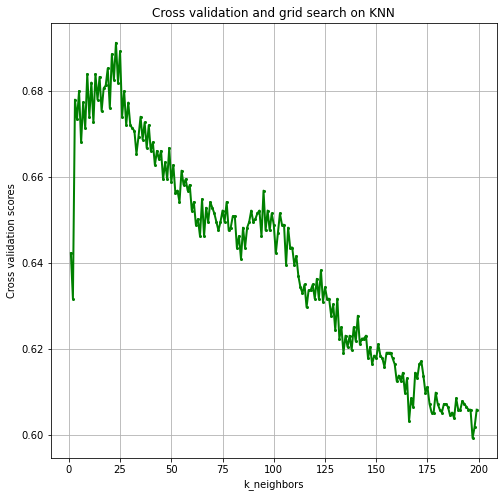

In [68]:
# plot the grid search graph
knn_scores = list()
knn_classifier = KNeighborsClassifier()
for k in k_neighbors:
    knn_classifier.n_neighbors = k
    k_scores = cross_val_score(knn_classifier, knn_x_train, knn_y_train,cv = 5,n_jobs=-1)
    knn_scores.append(np.mean(k_scores))


plt.figure(figsize=(8,8))
plt.plot(k_neighbors,knn_scores,color='green', marker='o',linewidth=2, markersize=2)
plt.grid(visible = True, axis='both')
plt.ylabel("Cross validation scores")
plt.xlabel("k_neighbors")
plt.xticks()
plt.title('Cross validation and grid search on KNN')